#  Sentimen analisis 

**Dataset = Amazon Fine Food Review**


Menggunakan VADER, HuggingFace, Roberta


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
import nltk

In [3]:
df = pd.read_csv('../input/amazon-review/Reviews.csv')
df.shape

(568454, 10)

In [4]:
df = df.head(1000)
df.shape

(1000, 10)

In [5]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


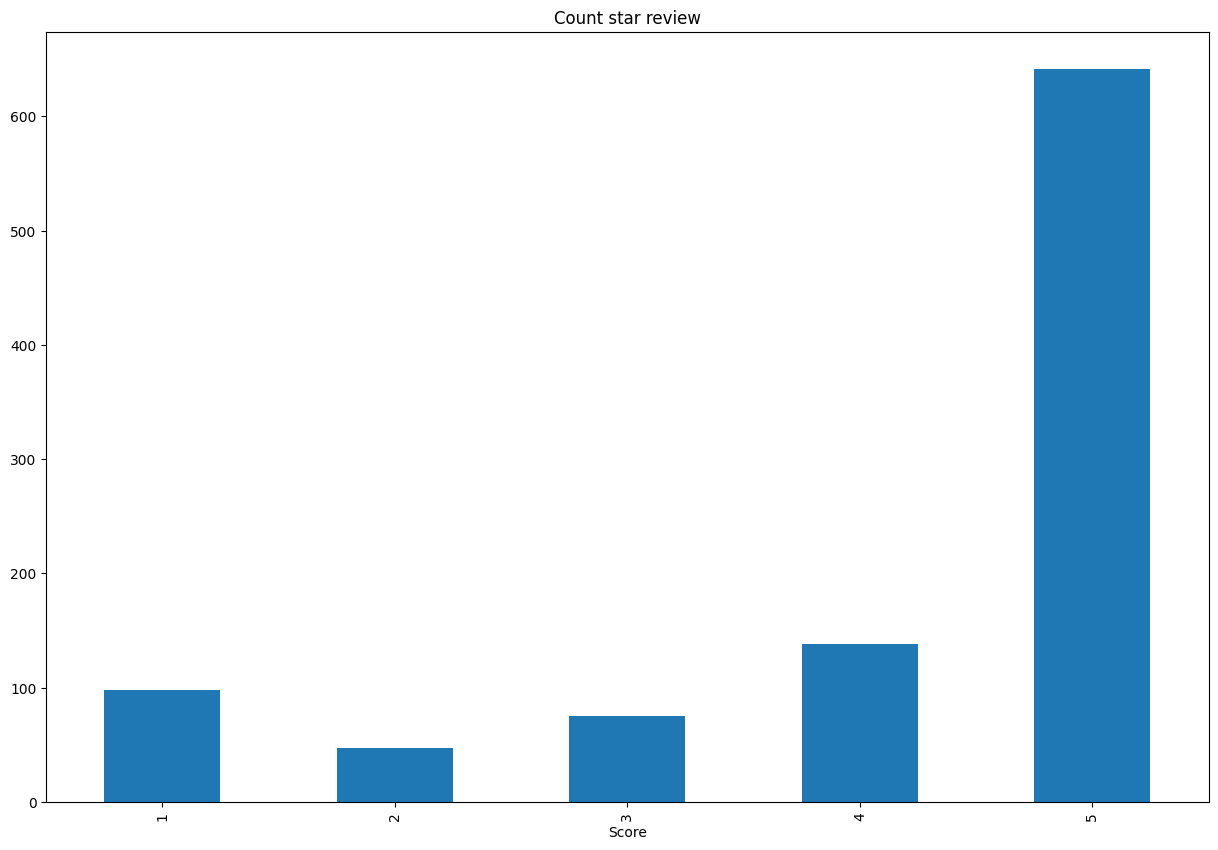

In [6]:
ax = df['Score'].value_counts().sort_index().plot(kind = 'bar', title = 'Count star review', figsize=(15,10))
plt.show()
ax.set_ylabel = 'counts'

In [7]:
contoh = df['Text'][0]
print(contoh)

I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [8]:
tokens = nltk.word_tokenize(contoh)

print(tokens[:])

['I', 'have', 'bought', 'several', 'of', 'the', 'Vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good', 'quality', '.', 'The', 'product', 'looks', 'more', 'like', 'a', 'stew', 'than', 'a', 'processed', 'meat', 'and', 'it', 'smells', 'better', '.', 'My', 'Labrador', 'is', 'finicky', 'and', 'she', 'appreciates', 'this', 'product', 'better', 'than', 'most', '.']


In [9]:
tagged = nltk.pos_tag(tokens)
tagged[:]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('Vitality', 'NNP'),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 ('Labrador', 'NNP'),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

In [10]:
entities = nltk.chunk.ne_chunk(tagged)
entities[:]

[('I', 'PRP'),
 ('have', 'VBP'),
 ('bought', 'VBN'),
 ('several', 'JJ'),
 ('of', 'IN'),
 ('the', 'DT'),
 Tree('ORGANIZATION', [('Vitality', 'NNP')]),
 ('canned', 'VBD'),
 ('dog', 'RP'),
 ('food', 'NN'),
 ('products', 'NNS'),
 ('and', 'CC'),
 ('have', 'VBP'),
 ('found', 'VBN'),
 ('them', 'PRP'),
 ('all', 'DT'),
 ('to', 'TO'),
 ('be', 'VB'),
 ('of', 'IN'),
 ('good', 'JJ'),
 ('quality', 'NN'),
 ('.', '.'),
 ('The', 'DT'),
 ('product', 'NN'),
 ('looks', 'VBZ'),
 ('more', 'RBR'),
 ('like', 'IN'),
 ('a', 'DT'),
 ('stew', 'NN'),
 ('than', 'IN'),
 ('a', 'DT'),
 ('processed', 'JJ'),
 ('meat', 'NN'),
 ('and', 'CC'),
 ('it', 'PRP'),
 ('smells', 'VBZ'),
 ('better', 'RBR'),
 ('.', '.'),
 ('My', 'PRP$'),
 Tree('ORGANIZATION', [('Labrador', 'NNP')]),
 ('is', 'VBZ'),
 ('finicky', 'JJ'),
 ('and', 'CC'),
 ('she', 'PRP'),
 ('appreciates', 'VBZ'),
 ('this', 'DT'),
 ('product', 'NN'),
 ('better', 'JJR'),
 ('than', 'IN'),
 ('most', 'JJS'),
 ('.', '.')]

# VADER Scoring

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

sia.polarity_scores(contoh)

/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}

In [12]:
#Running for entire dataset

hasil = []

for i,row in df.iterrows():
    teks = row['Text']
    id = row['Id']
    skor = sia.polarity_scores(teks)

    #simpan hasil
    hasil.append({
        'Id' : id,
        'Compound': skor['compound'],  # Skor utama sentimen
        'Positive': skor['pos'],
        'Neutral': skor['neu'],
        'Negative': skor['neg']
    })

#konversi hasil
hasil_df = pd.DataFrame(hasil)
# hasil_df = hasil_df.reset_index().rename(columns={'index':'Id'})
hasil_df = hasil_df.merge(df, how= 'left')

hasil_df.head()

,Id,Compound,Positive,Neutral,Negative,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.9441,0.305,0.695,0.000,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,-0.1027,0.068,0.853,0.079,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.8265,0.155,0.754,0.091,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.0000,0.000,1.000,0.000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.9468,0.448,0.552,0.000,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


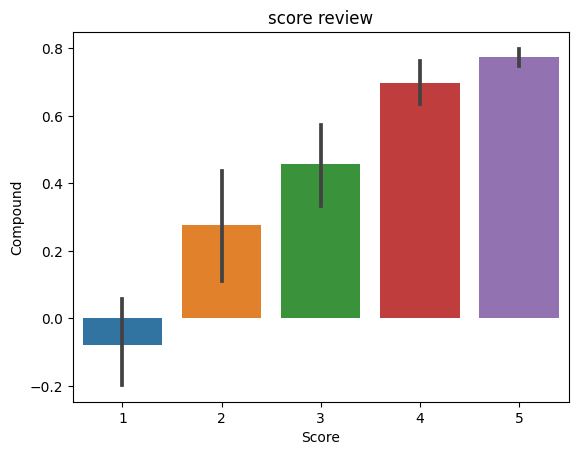

In [13]:
# df_plot = sns.load_dataset('')
ax = sns.barplot(x = 'Score', y ='Compound', data = hasil_df)
ax.set_title('score review')
plt.show()

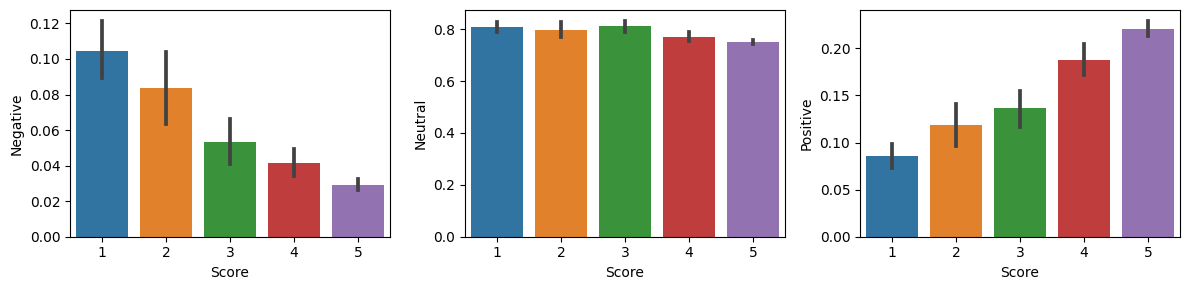

In [14]:
fig, axs = plt.subplots(1,3, figsize = (12,3))
sns.barplot(x = 'Score', y ='Negative', data = hasil_df, ax = axs[0])
sns.barplot(x = 'Score', y ='Neutral', data = hasil_df,ax = axs[1])
sns.barplot(x = 'Score', y ='Positive', data = hasil_df,ax = axs[2])
plt.tight_layout()

# ROBERTA PRE TRAINED MODEL


In [15]:
from transformers import RobertaConfig, RobertaModel
from transformers import RobertaTokenizer
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax



In [16]:
roberta_tokenizer = RobertaTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained('cardiffnlp/twitter-roberta-base-sentiment-latest')

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [17]:
encoded_text = roberta_tokenizer(contoh, return_tensors = 'pt')
# print(encoded_text)
output = model(**encoded_text)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
robert_scores = {"roberta_negative": scores[0],"roberta_neutral": scores[1],"roberta_positive": scores[2]}
print(robert_scores)

{'roberta_negative': 0.010577664, 'roberta_neutral': 0.038815655, 'roberta_positive': 0.9506067}


In [18]:
def roberta_polarity(contoh):
    encoded_text = roberta_tokenizer(contoh, return_tensors = 'pt')
    # print(encoded_text)
    output = model(**encoded_text)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    robert_scores = {"roberta_negative": scores[0],"roberta_neutral": scores[1],"roberta_positive": scores[2]}
    return robert_scores

In [19]:
result = {}
for i, row in df.iterrows():
    try:
        text = row['Text']
        id = row['Id']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = roberta_polarity(text)
        vader_and_roberta = {**vader_result_rename, **roberta_result}
        result[id] = vader_and_roberta
    except RuntimeError:
        print("the input text exceeds the maximum sequence length for the RoBERTa model",id)

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

the input text exceeds the maximum sequence length for the RoBERTa model 83
the input text exceeds the maximum sequence length for the RoBERTa model 187
the input text exceeds the maximum sequence length for the RoBERTa model 529
the input text exceeds the maximum sequence length for the RoBERTa model 540
the input text exceeds the maximum sequence length for the RoBERTa model 746
the input text exceeds the maximum sequence length for the RoBERTa model 863


In [20]:
id = [83,187, 529, 540, 746, 863]
for i in id:
    print(i, df['Text'][i],"\n")    


83 While my dogs like all of the flavors that we have tried of this dog food, for some reason their itching increased when I tried the lamb and rice. I have some very itchy dogs and am giving them a limited ingredient dog food to try to help. The duck and sweet potato cut down on the itching significantly, but when we tried lamb and rice they started itching more once again. I like Natural Balance for the quality ingredients. 

187 My Scotties were full of hot spots and when I used this within a week all the hot spots were gone. The smell is kinda strong, but not bad. It's tolerablel. 

529 Someone brought these to a party we had last month and I didn't put them out because the buffet was full and didn't think anyone would like saltless potato chips.  Last week we had some friends over and these were all I had in the pantry so I put them out.  OH MY GOSH THEY ARE SO GOOD!  I was so wrong to think they would be bland; they are full of real potato flavor, wonderfully crisp and very fresh

In [21]:
data_result = pd.DataFrame(result).T
data_result = data_result.reset_index().rename(columns={'index': 'Id'})
data_result = data_result.merge(df, how='left')
data_result.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_negative,roberta_neutral,roberta_positive,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.079,0.853,0.068,-0.1027,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047124,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Comparison

In [ ]:
# Menggunakan palet warna yang ramah untuk buta warna (Color Universal Design)
sns.pairplot(
    data_result[['vader_neg', 'vader_neu', 'vader_pos', 'roberta_negative', 'roberta_neutral', 'roberta_positive', 'Score']], 
    hue='Score',
    palette={1: 'black', 2: 'blue', 3: 'yellow', 4: 'red', 5: 'purple' }  
)

# Menambahkan judul pada plot
plt.suptitle('Pairplot Persebaran dan Hubungan Antar Prediksi Berdasarkan Scores', y=1.02)

# Menampilkan plot
plt.show()


### **False Positive**

#### Dimana seharusnya review itu buruk, tetapi mesin mengartikan review itu baik

Vader FP

Vader dapat mengartikan dengan baik review, dimana score bintang satu teratas memiliki nilai positive yang rendah yaitu 0.274




In [23]:
(data_result.query('Score == 1').sort_values('vader_pos', ascending=False)[['Id','Text', 'vader_pos']])

,Id,Text,vader_pos
322,325,So we cancelled the order. It was cancelled w...,0.274
507,510,"Kettle chips now look, feel and taste like Lay...",0.237
163,165,Seriously this product was as tasteless as the...,0.223
619,624,and THAT is the problem. I order these by the...,0.217
900,907,"Wow, i am shocked to find clear plastic pieces...",0.201
...,...,...,...
775,781,This is NOT Disco Dust which is edible and mad...,0.000
250,253,"Five minutes in, one tentacle was bitten off, ...",0.000
764,770,This kind of tea not good ....!Taste and smell...,0.000
214,217,"Hey, the description says 360 grams - that is ...",0.000


In [24]:
data_result['Text'][322]

'So we cancelled the order.  It was cancelled without any problem.  That is a positive note...'

Roberta FP

Sedangkan Roberta dimana review bintang satu, mendapatkan nilai positive yang tinggi, dan ini terjadi di banyak record

In [25]:
(data_result.query('Score == 1').sort_values('roberta_positive', ascending=False)[['Id','Text', 'roberta_positive']])

,Id,Text,roberta_positive
786,792,If it were possible to give this product zero ...,0.837304
733,738,I love Cherrybrook Kitchen and have tried almo...,0.734506
537,542,I've bought these at the local supermarket and...,0.671757
322,325,So we cancelled the order. It was cancelled w...,0.645320
937,944,This is my daughter's most favorite baby food...,0.558600
...,...,...,...
415,418,"A vile, miserable pancake. I put these in fron...",0.006054
379,382,These condiments are overpriced and terrible. ...,0.006013
399,402,This mix is very poorly packaged and breaks op...,0.005764
50,51,"This oatmeal is not good. Its mushy, soft, I d...",0.005561


In [26]:
data_result['Text'][786]

'If it were possible to give this product zero stars, I would have done so.  I am a huge fan of Twinings teas, and was very excited to try this new blend.  After arriving home from the grocery, I immediately started the kettle to enjoy a cup while prepping dinner.  Between sorting, washing, and chopping items, the hot water was added to the bag to steep.  Preparation continued, until a distinctly off odor hit me.  I thought one of my ingredients must be rancid!  I hunted around for almost four minutes before I realized it was the tea.  Even after cleaning up, and airing out the kitchen, my roommate later came in and asked about the smell.  Save your money to purchase ANY other Twinings product.'

Kemungkinan mesin bingung untuk mengartikan review yang memiliki beberapa kalimat atau kalimat yang panjang. Atau mungkin mesin hanya menilai dari kata per kata dimana lebih banyak kata yang memiliki makna positif yang padahal jika dibaca dengan lengkap, artinya negative

### **True Negative**

**Dimana skor bintang review bagus, tapi mesin mengartikan itu buruk**


Vader TN

Vader dapat mengartikan review dengan score bintang 5 dengan cukup baik, dimana nilai paling tinggi untuk negative adalah 0.344 (cukup rendah

In [27]:
(data_result.query('Score == 5').sort_values('vader_neg', ascending=False)[['Id','Text', 'vader_neg']])

,Id,Text,vader_neg
69,70,this was sooooo deliscious but too bad i ate e...,0.344
656,661,"I love using this to sweeten tea, coffee, etc....",0.228
743,749,"If this flavor lasted longer than it does, I'd...",0.220
155,157,What a deal this is the healthiest salt you ca...,0.191
184,186,We had trouble finding this locally - delivery...,0.189
...,...,...,...
367,370,"Green Mountain ""Nantucket Blend"" K-Cups make a...",0.000
364,367,I was buying Quaker Oats granola bars but thes...,0.000
296,299,If you're looking for an energy boost without ...,0.000
295,298,"I've tried 5-hour energy, red rain, NOS, and o...",0.000


In [28]:
data_result['Text'][69]

'this was sooooo deliscious but too bad i ate em too fast and gained 2 pds! my fault'

Roberta TN

In [29]:
(data_result.query('Score == 5').sort_values('roberta_negative', ascending=False)[['Id','Text', 'roberta_negative']])

,Id,Text,roberta_negative
604,609,This bags are very difficult to open with the ...,0.874436
596,601,I've eaten other brands of unsalted potato chi...,0.864874
744,750,this gum is super sick.tatooes are killin.flav...,0.858669
743,749,"If this flavor lasted longer than it does, I'd...",0.851563
892,899,The product is all that it says it is which is...,0.851017
...,...,...,...
774,780,These were great - just as described. Used the...,0.002127
172,174,I couldn't wait to try the 8&#8243; Cinnamon C...,0.002115
753,759,"Saw this on How it is made, which was a very i...",0.002111
646,651,We make up a coffee creamer with 1/4 part comm...,0.002099


In [30]:
data_result['Text'][604]

"This bags are very difficult to open with the aid of some tool, such as scissors, don't even try without scissors.<br /><br />They are crispy and taste like chips that aren't advertised as being salted. They definitely aren't healthy, because I can feel the grease all over my fingers when eating them, and I can see the grease at the bottom of the bag, too.<br /><br />They are high-quality chips, and deserve to be put on your table."

Kalimat review tersebut lebih banyak mengandung kata kata negatif dan terdapat point positif, jadi walaupun memiliki score bintang 5, mesin tetap membaca bahwa review tersebut negatif


In [31]:
data_result['Text'][596]

"I've eaten other brands of unsalted potato chips and they've always been terrible.  I didn't expect much when I bought these.  But after I tasted them I was amazed.  I have never enjoyed unsalted potato chips before these.  They have a natural potato flavor with thick, crunchy chips.  The only bad thing is the bag is a pain to open.  Use scissors and save yourself the aggravation."

In [32]:
import spacy 

In [33]:
!python -m spacy download en_core_web_sm

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 96.1 MB/s eta 0:00:0000:0100:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
